# 目的

FTXの一年分のデータを使ってbotを作る

In [20]:
import os 
import sys 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

In [13]:
df = pd.read_csv("../data/FTX_BTCUSDT_minute.csv")

In [15]:
df.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USDT'],
      dtype='object')

In [26]:
df = df.sort_values("date")  #特徴量抽出のために順序変え

In [27]:
df_feat = calc_features(df)

In [28]:
df_feat

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,BBANDS_upperband,...,HT_SINE_sine,HT_SINE_leadsine,HT_TRENDMODE,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,STDDEV
621003,1.605840e+12,2020-11-20 02:44:00,BTC/USDT,17966.5,17970.5,17960.0,17966.5,0.080379,1444.12895,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621002,1.605840e+12,2020-11-20 02:45:00,BTC/USDT,17966.5,17972.0,17957.0,17957.0,0.022313,400.67525,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621001,1.605840e+12,2020-11-20 02:46:00,BTC/USDT,17957.0,17966.0,17955.0,17964.5,0.000000,0.00000,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
621000,1.605840e+12,2020-11-20 02:47:00,BTC/USDT,17964.5,17979.0,17963.0,17973.0,0.078906,1418.17650,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620999,1.605840e+12,2020-11-20 02:48:00,BTC/USDT,17973.0,17974.5,17958.0,17962.5,0.174460,3133.73830,8.892222,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,5.221111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.643821e+12,2022-02-02 17:01:00,BTC/USDT,37289.0,37289.0,37273.0,37274.0,1.202234,44812.06950,72.252601,...,-0.178693,-0.822081,0,0.322546,0.982818,41.085714,-9.849863,43.342857,-0.173626,22.826301
3,1.643821e+12,2022-02-02 17:02:00,BTC/USDT,37274.0,37301.0,37274.0,37301.0,1.684954,62850.47040,58.152081,...,-0.254435,-0.863748,1,0.328082,0.982636,4.000000,-63.807801,30.428571,-2.032967,21.326040
2,1.643821e+12,2022-02-02 17:03:00,BTC/USDT,37301.0,37357.0,37301.0,37353.0,3.644023,136115.20480,40.531825,...,-0.376368,-0.921246,1,0.409104,0.981574,-46.228571,-69.638820,-11.200000,-2.694505,29.465913
1,1.643821e+12,2022-02-02 17:04:00,BTC/USDT,37353.0,37366.0,37350.0,37350.0,1.393668,52053.50210,19.955093,...,-0.544291,-0.978061,0,0.467780,0.982087,-36.085714,-61.442387,-12.200000,-1.837363,32.277546


In [21]:
def calc_features(df):
    open = df['open']
    high = df['high']
    low = df['low']
    close = df['close']
    volume = df['Volume BTC']
    
    orig_columns = df.columns

    hilo = (df['high'] + df['low']) / 2
    df['BBANDS_upperband'], df['BBANDS_middleband'], df['BBANDS_lowerband'] = talib.BBANDS(close, timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)
    df['BBANDS_upperband'] -= hilo
    df['BBANDS_middleband'] -= hilo
    df['BBANDS_lowerband'] -= hilo
    df['DEMA'] = talib.DEMA(close, timeperiod=30) - hilo
    df['EMA'] = talib.EMA(close, timeperiod=30) - hilo
    df['HT_TRENDLINE'] = talib.HT_TRENDLINE(close) - hilo
    df['KAMA'] = talib.KAMA(close, timeperiod=30) - hilo
    df['MA'] = talib.MA(close, timeperiod=30, matype=0) - hilo
    df['MIDPOINT'] = talib.MIDPOINT(close, timeperiod=14) - hilo
    df['SMA'] = talib.SMA(close, timeperiod=30) - hilo
    df['T3'] = talib.T3(close, timeperiod=5, vfactor=0) - hilo
    df['TEMA'] = talib.TEMA(close, timeperiod=30) - hilo
    df['TRIMA'] = talib.TRIMA(close, timeperiod=30) - hilo
    df['WMA'] = talib.WMA(close, timeperiod=30) - hilo

    df['ADX'] = talib.ADX(high, low, close, timeperiod=14)
    df['ADXR'] = talib.ADXR(high, low, close, timeperiod=14)
    df['APO'] = talib.APO(close, fastperiod=12, slowperiod=26, matype=0)
    df['AROON_aroondown'], df['AROON_aroonup'] = talib.AROON(high, low, timeperiod=14)
    df['AROONOSC'] = talib.AROONOSC(high, low, timeperiod=14)
    df['BOP'] = talib.BOP(open, high, low, close)
    df['CCI'] = talib.CCI(high, low, close, timeperiod=14)
    df['DX'] = talib.DX(high, low, close, timeperiod=14)
    df['MACD_macd'], df['MACD_macdsignal'], df['MACD_macdhist'] = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
    # skip MACDEXT MACDFIX たぶん同じなので
    df['MFI'] = talib.MFI(high, low, close, volume, timeperiod=14)
    df['MINUS_DI'] = talib.MINUS_DI(high, low, close, timeperiod=14)
    df['MINUS_DM'] = talib.MINUS_DM(high, low, timeperiod=14)
    df['MOM'] = talib.MOM(close, timeperiod=10)
    df['PLUS_DI'] = talib.PLUS_DI(high, low, close, timeperiod=14)
    df['PLUS_DM'] = talib.PLUS_DM(high, low, timeperiod=14)
    df['RSI'] = talib.RSI(close, timeperiod=14)
    df['STOCH_slowk'], df['STOCH_slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    df['STOCHF_fastk'], df['STOCHF_fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0)
    df['STOCHRSI_fastk'], df['STOCHRSI_fastd'] = talib.STOCHRSI(close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
    df['TRIX'] = talib.TRIX(close, timeperiod=30)
    df['ULTOSC'] = talib.ULTOSC(high, low, close, timeperiod1=7, timeperiod2=14, timeperiod3=28)
    df['WILLR'] = talib.WILLR(high, low, close, timeperiod=14)

    df['AD'] = talib.AD(high, low, close, volume)
    df['ADOSC'] = talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
    df['OBV'] = talib.OBV(close, volume)

    df['ATR'] = talib.ATR(high, low, close, timeperiod=14)
    df['NATR'] = talib.NATR(high, low, close, timeperiod=14)
    df['TRANGE'] = talib.TRANGE(high, low, close)

    df['HT_DCPERIOD'] = talib.HT_DCPERIOD(close)
    df['HT_DCPHASE'] = talib.HT_DCPHASE(close)
    df['HT_PHASOR_inphase'], df['HT_PHASOR_quadrature'] = talib.HT_PHASOR(close)
    df['HT_SINE_sine'], df['HT_SINE_leadsine'] = talib.HT_SINE(close)
    df['HT_TRENDMODE'] = talib.HT_TRENDMODE(close)

    df['BETA'] = talib.BETA(high, low, timeperiod=5)
    df['CORREL'] = talib.CORREL(high, low, timeperiod=30)
    df['LINEARREG'] = talib.LINEARREG(close, timeperiod=14) - close
    df['LINEARREG_ANGLE'] = talib.LINEARREG_ANGLE(close, timeperiod=14)
    df['LINEARREG_INTERCEPT'] = talib.LINEARREG_INTERCEPT(close, timeperiod=14) - close
    df['LINEARREG_SLOPE'] = talib.LINEARREG_SLOPE(close, timeperiod=14)
    df['STDDEV'] = talib.STDDEV(close, timeperiod=5, nbdev=1)

    return df

In [90]:
df = pd.read_pickle("./mlbot_tutorial/work/df_ohlcv.pkl")

In [91]:
df

,op,hi,lo,cl,volume
timestamp,,,,,
2018-09-05 08:00:00+00:00,818724.0,818724.0,818724.0,818724.0,0.01
2018-09-05 08:15:00+00:00,821250.0,821250.0,821250.0,821250.0,0.01
2018-09-05 08:45:00+00:00,819260.0,819765.0,819260.0,819765.0,0.03
2018-09-05 09:00:00+00:00,820000.0,821388.0,819500.0,819546.0,1.22
2018-09-05 09:15:00+00:00,820441.0,821530.0,819646.0,820244.0,14.77
...,...,...,...,...,...
2021-03-31 22:45:00+00:00,6500673.0,6515799.0,6495153.0,6501148.0,24.83
2021-03-31 23:00:00+00:00,6500548.0,6514344.0,6491034.0,6504636.0,48.64
2021-03-31 23:15:00+00:00,6505950.0,6529377.0,6491838.0,6523540.0,38.07


In [78]:
df = pd.read_csv("../data/nb002/btc15min_20211229.csv")
df = df.sort_values("date") 
df = df[120000:]
df.reset_index(inplace=True, drop=True)

KeyError: 'date'

In [93]:
# df.columns = ["date", "open", "high", "low", "close", "Volume BTC"]
df.columns = ["open", "high", "low", "close", "Volume BTC"]

In [94]:
df

,open,high,low,close,Volume BTC
timestamp,,,,,
2018-09-05 08:00:00+00:00,818724.0,818724.0,818724.0,818724.0,0.01
2018-09-05 08:15:00+00:00,821250.0,821250.0,821250.0,821250.0,0.01
2018-09-05 08:45:00+00:00,819260.0,819765.0,819260.0,819765.0,0.03
2018-09-05 09:00:00+00:00,820000.0,821388.0,819500.0,819546.0,1.22
2018-09-05 09:15:00+00:00,820441.0,821530.0,819646.0,820244.0,14.77
...,...,...,...,...,...
2021-03-31 22:45:00+00:00,6500673.0,6515799.0,6495153.0,6501148.0,24.83
2021-03-31 23:00:00+00:00,6500548.0,6514344.0,6491034.0,6504636.0,48.64
2021-03-31 23:15:00+00:00,6505950.0,6529377.0,6491838.0,6523540.0,38.07


In [95]:
df_feat = calc_features(df)
df_feat = df_feat.dropna()

In [96]:
df_feat

,open,high,low,close,Volume BTC,BBANDS_upperband,BBANDS_middleband,BBANDS_lowerband,DEMA,EMA,...,HT_SINE_sine,HT_SINE_leadsine,HT_TRENDMODE,BETA,CORREL,LINEARREG,LINEARREG_ANGLE,LINEARREG_INTERCEPT,LINEARREG_SLOPE,STDDEV
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-09-06 09:00:00+00:00,715783.0,715783.0,712783.0,714678.0,0.04,4683.522898,-149.8,-4983.122898,-8388.431868,7379.743300,...,0.063009,0.750256,0,0.614492,0.785616,-1278.657143,-89.605527,609.514286,-145.243956,2416.661449
2018-09-06 09:15:00+00:00,715084.0,715084.0,712857.0,714808.0,0.33,5082.538594,224.3,-4633.938594,-7914.581541,7250.001797,...,0.240386,0.856351,0,0.592726,0.781600,-1119.685714,-89.382963,87.400000,-92.852747,2429.119297
2018-09-06 09:30:00+00:00,712745.0,712745.0,703500.0,708836.0,4.34,11605.681872,5788.3,-29.081872,-2634.673163,12299.001681,...,0.350445,0.910066,0,0.998143,0.742460,3979.114286,-89.547035,5623.457143,-126.487912,2908.690936
2018-09-06 09:45:00+00:00,710667.0,710677.0,707596.0,710515.0,0.44,10629.740000,4186.3,-2257.140000,-3922.234413,10645.872541,...,0.348437,0.909176,0,0.599026,0.770249,2120.485714,-89.202841,3054.800000,-71.870330,3221.720000
2018-09-06 10:00:00+00:00,712795.0,712954.0,711320.0,712954.0,0.12,4915.132151,221.2,-4472.732151,-6835.514927,7204.832377,...,0.408689,0.934345,1,1.481732,0.778162,315.457143,89.274816,-711.600000,79.004396,2346.966076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31 22:45:00+00:00,6500673.0,6515799.0,6495153.0,6501148.0,24.83,23181.091959,3403.6,-16373.891959,24338.412269,14222.640793,...,0.725659,0.999646,1,0.220332,0.791673,7450.342857,-89.950005,22348.657143,-1146.024176,9888.745979
2021-03-31 23:00:00+00:00,6500548.0,6514344.0,6491034.0,6504636.0,48.64,7228.746675,1552.0,-4124.746675,24591.910992,16037.857516,...,0.746594,0.998346,1,0.729872,0.795980,5234.600000,-89.885707,11751.542857,-501.303297,2838.373338
2021-03-31 23:15:00+00:00,6505950.0,6529377.0,6491838.0,6523540.0,38.07,13610.327207,-3138.5,-19887.327207,16722.553326,8429.882837,...,0.690296,0.999724,1,0.314238,0.802666,-13763.742857,-89.932067,-2799.400000,-843.410989,8374.413604


In [97]:
pips = 1

# ATRで指値距離を計算します
limit_price_dist = df_feat['ATR'] * 0.5
limit_price_dist = np.maximum(1, (limit_price_dist / pips).round().fillna(1)) * pips
df_feat['buy_price'] = df_feat['close'] - limit_price_dist
df_feat['sell_price'] = df_feat['close'] + limit_price_dist

entry_price_buy = df_feat["buy_price"].values
lo = df_feat["low"].values
y_buy = entry_price_buy.copy()
y_buy[:] = np.nan
y_buy_t = entry_price_buy.copy()
y_buy_t[:] = np.nan

for i in range(entry_price_buy.size):
    for j in range(i+1,entry_price_buy.size):
        if round(lo[j]) < round(entry_price_buy[j-1]):
            y_buy[i] = entry_price_buy[j-1]
            y_buy_t[i] = j - i 
            break

entry_price_sell = df_feat["sell_price"].values
hi = df_feat["high"].values
y_sell = entry_price_sell.copy()
y_sell[:] = np.nan
y_sell_t = entry_price_sell.copy()
y_sell_t[:] = np.nan

for i in range(entry_price_sell.size):
    for j in range(i+1,entry_price_sell.size):
        if round(hi[j]) > round(entry_price_sell[j-1]):
            y_sell[i] = entry_price_sell[j-1]
            y_sell_t[i] = j - i 
            break

df_feat['buy_fep'] = y_buy
df_feat['sell_fep'] = y_sell

df_feat['buy_executed'] = ((df_feat['buy_price']).round() > (df_feat['low'].shift(-1)).round()).astype('float64')
df_feat['sell_executed'] = ((df_feat['sell_price']).round() < (df_feat['high'].shift(-1)).round()).astype('float64')

horizon = 1

df_feat['y_buy'] = np.where(
    df_feat['buy_executed'],
    df_feat['sell_fep'].shift(-horizon) / df_feat['buy_price'] - 1,
    0
)
df_feat['y_sell'] = np.where(
    df_feat['sell_executed'],
    df_feat['sell_price'] / df_feat['buy_fep'].shift(-horizon) -1,
    0
)

<ipython-input-97-16b1522bd38f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feat['buy_price'] = df_feat['close'] - limit_price_dist
<ipython-input-97-16b1522bd38f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feat['sell_price'] = df_feat['close'] + limit_price_dist
<ipython-input-97-16b1522bd38f>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/usr/local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='timestamp'>

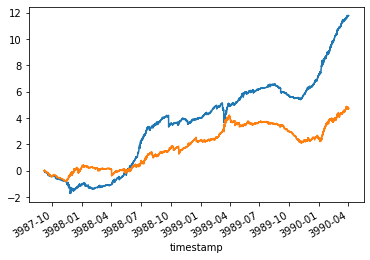

In [98]:
df_feat['y_buy'].cumsum().plot(label='買い')
df_feat['y_sell'].cumsum().plot(label='売り')

# 色々試す

<ipython-input-89-8d03e1528cbd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feat['buy_price'] = df_feat['close'] - limit_price_dist
<ipython-input-89-8d03e1528cbd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feat['sell_price'] = df_feat['close'] + limit_price_dist
<ipython-input-89-8d03e1528cbd>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

<AxesSubplot:>

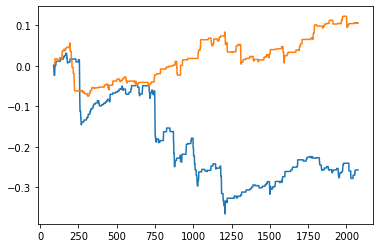

In [89]:
pips = 2

# ATRで指値距離を計算します
limit_price_dist = df_feat['ATR'] * 1
limit_price_dist = np.maximum(1, (limit_price_dist / pips).round().fillna(1)) * pips
df_feat['buy_price'] = df_feat['close'] - limit_price_dist
df_feat['sell_price'] = df_feat['close'] + limit_price_dist

entry_price_buy = df_feat["buy_price"].values
lo = df_feat["low"].values
y_buy = entry_price_buy.copy()
y_buy[:] = np.nan
y_buy_t = entry_price_buy.copy()
y_buy_t[:] = np.nan

for i in range(entry_price_buy.size):
    for j in range(i+1,entry_price_buy.size):
        if round(lo[j]) < round(entry_price_buy[j-1]):
            y_buy[i] = entry_price_buy[j-1]
            y_buy_t[i] = j - i 
            break

entry_price_sell = df_feat["sell_price"].values
hi = df_feat["high"].values
y_sell = entry_price_sell.copy()
y_sell[:] = np.nan
y_sell_t = entry_price_sell.copy()
y_sell_t[:] = np.nan

for i in range(entry_price_sell.size):
    for j in range(i+1,entry_price_sell.size):
        if round(hi[j]) > round(entry_price_sell[j-1]):
            y_sell[i] = entry_price_sell[j-1]
            y_sell_t[i] = j - i 
            break

df_feat['buy_fep'] = y_buy
df_feat['sell_fep'] = y_sell

df_feat['buy_executed'] = ((df_feat['buy_price']).round() > (df_feat['low'].shift(-1)).round()).astype('float64')
df_feat['sell_executed'] = ((df_feat['sell_price']).round() < (df_feat['high'].shift(-1)).round()).astype('float64')

horizon = 1

df_feat['y_buy'] = np.where(
    df_feat['buy_executed'],
    df_feat['sell_fep'].shift(-horizon) / df_feat['buy_price'] - 1,
    0
)
df_feat['y_sell'] = np.where(
    df_feat['sell_executed'],
    df_feat['sell_price'] / df_feat['buy_fep'].shift(-horizon) -1,
    0
)

df_feat['y_buy'].cumsum().plot(label='買い')
df_feat['y_sell'].cumsum().plot(label='売り')